In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df.drop(['salary_id', 'location_latitude', 'location_longitude', 'comments', 'submitted_at'], axis=1, inplace=True)

    columns_to_replace = ['signing_bonus', 'annual_bonus', 'stock_value_bonus']
    df[columns_to_replace] = df[columns_to_replace].replace('', 0)

    return df

def filter_data(df):
    df_filtered = df[df['job_title_category'] != 'Other']
    df_filtered2 = df_filtered[(df_filtered['annual_base_pay'] >= 20000) & (df_filtered['annual_base_pay'] <= 500000)]
    return df_filtered2

def calculate_avg_salary_per_category(df_filtered2):
    sal_category = round(df_filtered2.groupby(['job_title_category'])['annual_base_pay'].mean(), 0)
    return sal_category

def calculate_avg_salary_per_category_and_experience(df_filtered2):
    sal_title = round(df_filtered2.groupby(['job_title_category', 'total_experience_years'])['annual_base_pay'].mean(), 0)
    return sal_title

def calculate_avg_experience_salary(df_filtered2):
    exp = round(df_filtered2.groupby(['total_experience_years'])['annual_base_pay'].mean(), 0)
    return exp

def calculate_avg_signing_bonus(df_filtered2):
    bonus = round(df_filtered2.groupby(['job_title_category'])['signing_bonus'].mean(), 0)
    return bonus

def plot_salary_histogram(df_filtered2):
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.hist(df.annual_base_pay, bins=[20000, 40000, 60000, 80000, 100000, 120000])
    plt.show()



def plot_high_pay_jobs_bar(df_filtered2):
    high_pay_jobs = df_filtered2[df_filtered2['annual_base_pay'] >= 120000]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(high_pay_jobs['job_title_category'], high_pay_jobs['annual_base_pay'])
    ax.set_xlabel('Job Title')
    ax.set_ylabel('Annual Base Pay')
    ax.set_title('Jobs with Annual Base Pay at Least $120,000')
    plt.show()





job_title_category
Applied Science    106069.0
Data                82430.0
Engineering        107971.0
Management         114838.0
Operations          88225.0
Software           106256.0
Web                 83512.0
Name: annual_base_pay, dtype: float64
job_title_category  total_experience_years
Applied Science     5.0                        83500.0
                    6.0                       155000.0
                    7.0                        60480.0
                    8.0                        98000.0
                    10.0                       80000.0
                                                ...   
Web                 14.0                      149310.0
                    15.0                      122500.0
                    16.0                       95862.0
                    19.0                       58000.0
                    20.0                      109800.0
Name: annual_base_pay, Length: 138, dtype: float64
total_experience_years
0.00      91022.0
0.50   

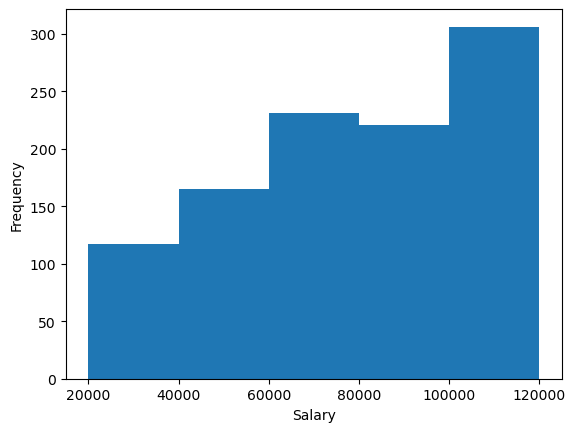

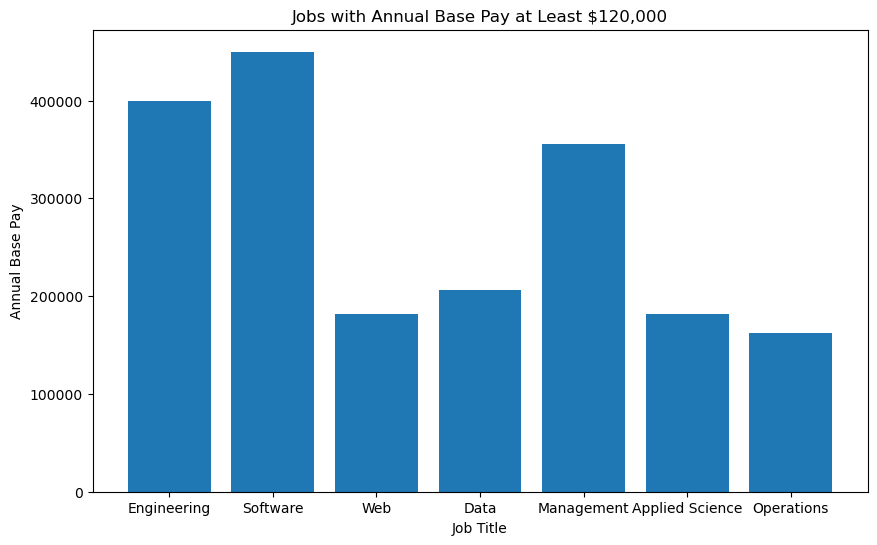

In [18]:
file_path = "/Users/gozi/Desktop/Scripting for Data Analysis/hmwk 1/salaries_clean.csv"
df = read_and_clean_data(file_path)
df_filtered2 = filter_data(df)

sal_category = calculate_avg_salary_per_category(df_filtered2)
print(sal_category)

sal_title = calculate_avg_salary_per_category_and_experience(df_filtered2)
print(sal_title)

exp = calculate_avg_experience_salary(df_filtered2)
print(exp)

bonus = calculate_avg_signing_bonus(df_filtered2)
print(bonus)

plot_salary_histogram(df_filtered2)

plot_high_pay_jobs_bar(df_filtered2)
